In [1]:
##TITANIC SURVIVAL PREDICTION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly as py
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

In [3]:
train=pd.read_csv("titanic_train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# # Exploratory data analysis

Now finding number of missing values

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

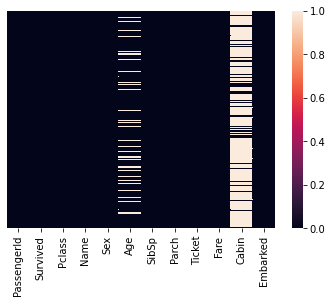

In [7]:
sns.heatmap(train.isnull(),yticklabels=False)

In [8]:
#Three columns are having null values ie Cabin, Age ,Embark.
#But there are only 2 null values in embark therefore it can be replaced with most commonly occuring value.

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# so the port S is the most frequently occuring and hence we can replace the two null values with S


In [11]:
train['Embarked'].fillna('S',inplace=True)

In [12]:
train['Embarked'].isnull().sum()

0

In [13]:
#hence both the null values are replaced and no null value exist in Embarked.

In [14]:
train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [15]:
train['Embarked']=train['Embarked'].astype(str,copy=True)

In [16]:
train['Embarked']=train['Embarked'].map({'S':1,'C':2,'Q':3})

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1


In [18]:
train[['Survived','Embarked']].groupby(['Embarked']).mean()

,Survived
Embarked,
1,0.339009
2,0.553571
3,0.389610


In [19]:
# this shows people from c port survive dthe most.

<AxesSubplot:xlabel='Survived', ylabel='count'>

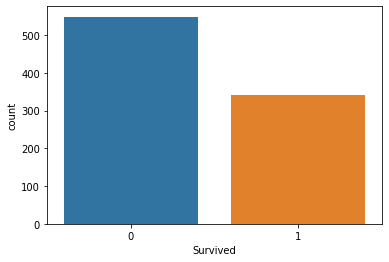

In [20]:
sns.countplot(x="Survived",data=train)

In [21]:
#this plot gives us an rough idea of how many survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

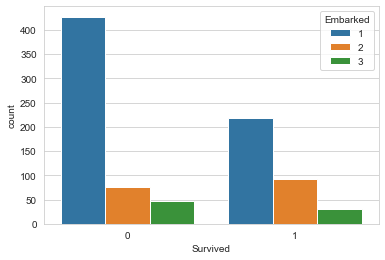

In [22]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Embarked",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

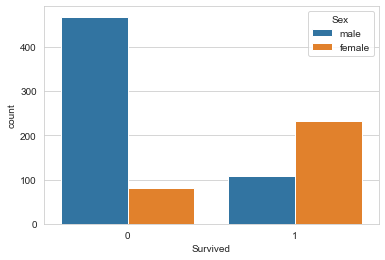

In [23]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Sex",data=train)

In [24]:
#Distribution on the basis of Sex.

<AxesSubplot:xlabel='Survived', ylabel='count'>

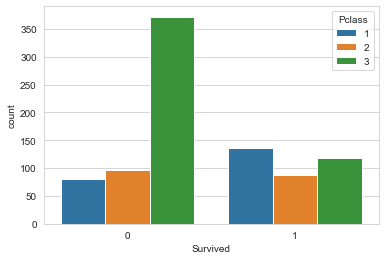

In [25]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Pclass",data=train)

In [26]:
#Disribution pn basis of passenger class.We noticed that people from Pclass 3 died more.

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

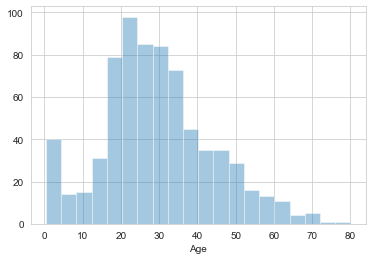

In [27]:
sns.distplot(train['Age'].dropna(),kde=False)

<AxesSubplot:>

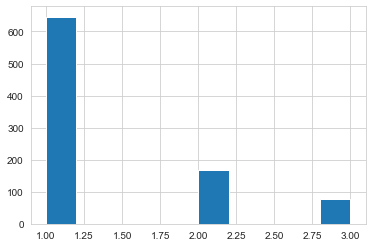

In [28]:
train['Embarked'].hist()

<AxesSubplot:>

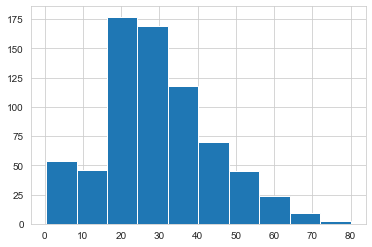

In [29]:
train['Age'].hist()

In [30]:
#This is visual analysis of age.

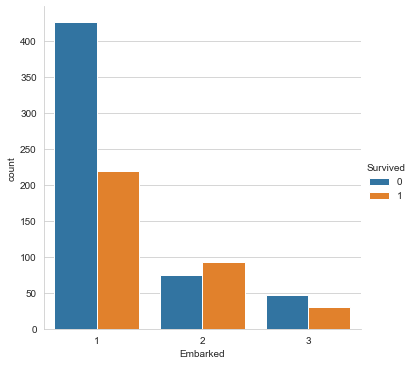

In [31]:
sns.catplot(x='Embarked',kind='count',data=train,hue='Survived')

In [32]:
#visual analysis of embarked

# # AGE

In [33]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [34]:
# mean=29.69  std=14  max=80  min=0.42

In [35]:
train['Age'].isnull().sum()

177

In [36]:
#there are 177 null values in age 
# data type of age is float

In [37]:
#so we can either replace all null values with mean or median 
#hence creating a mean variable
mean_age=train['Age'].mean()
mean_age

29.69911764705882

In [38]:
train['Age'].fillna(mean_age,inplace=True)

In [39]:
train['Age'].isnull().sum()

0

In [40]:
#hence all null values are replaced by mean
std_age=train['Age'].std()
std_age

13.002015226002882

In [41]:
# earlier std was 14 and now it is 13 
#hence not much deviation 

In [42]:
#convert age data type from float into int

In [43]:
train['Age']=train['Age'].astype(int)

In [44]:
train.loc[train['Age']<=10,'Age']=0
train.loc[(train['Age']>10) & (train['Age']<=20),'Age']=1
train.loc[(train['Age']>20) & (train['Age']<=30),'Age']=2
train.loc[(train['Age']>30) & (train['Age']<=40),'Age']=3
train.loc[(train['Age']>40) & (train['Age']<=50) ,'Age']=4
train.loc[(train['Age']>50) & (train['Age']<=60),'Age']=5
train.loc[(train['Age']>60) & (train['Age']<=70),'Age']=6
train.loc[(train['Age']>70) & (train['Age']<=80),'Age']=7


In [45]:
train['Age'].value_counts()

2    408
3    155
1    116
4     84
0     64
5     42
6     18
7      4
Name: Age, dtype: int64

In [46]:
# find the corelation between age and survived in order to know which age group survived more.

In [47]:
train[['Survived','Age']].groupby(['Age']).mean().sort_values(by='Survived',ascending=False)

,Survived
Age,
0,0.593750
3,0.445161
5,0.404762
4,0.392857
1,0.379310
2,0.333333
7,0.250000
6,0.222222


<AxesSubplot:xlabel='Survived', ylabel='count'>

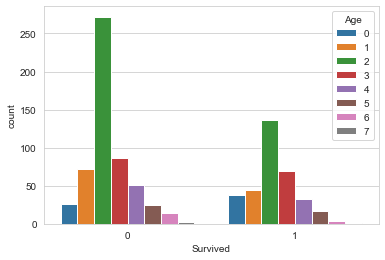

In [48]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Age",data=train)

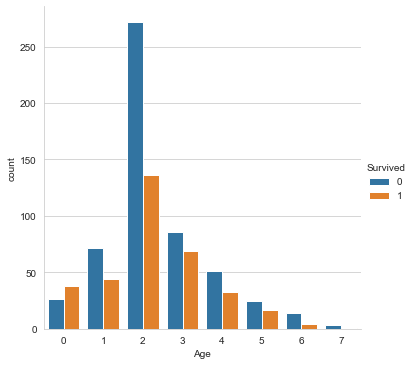

In [49]:
sns.catplot(x='Age',kind='count',data=train,hue='Survived')

In [50]:
# hence most people survived from category 2 ie 20-30 age and least from 7the group.

# # Cabin

In [51]:
train['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [52]:
# Missing values
train['Cabin'].isnull().sum()

687

In [53]:
# Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level
#  Cabin feature has 77 percent missing values 
#  We can either drop this column or can replace all the nan values with the random values from the
# cabin column (non nan values)

In [54]:
# Create a random sample 

In [55]:
#  Here train['Cabin'].dropna() is our sample which doesn't contain any nan values
#  and now we will randomly feed values from our sample into train['Cabin'].isnull().sum() which  
# contain 687 nan values.

In [56]:
random_sample=train['Cabin'].dropna().sample(train['Cabin'].isnull().sum(),random_state=0,replace=True)

In [57]:
len(random_sample)

687

In [58]:
random_sample.isnull().sum()

0

In [59]:
pd.Categorical(random_sample)

['B22', 'D35', 'F33', 'E49', 'C54', ..., 'B37', 'B18', 'C92', 'D6', 'E40']
Length: 687
Categories (147, object): ['A10', 'A14', 'A16', 'A19', ..., 'F38', 'F4', 'G6', 'T']

In [60]:
random_sample.index

Int64Index([745, 248, 516, 835, 310, 853, 460,  52, 110, 185,
            ...
            429, 457, 456, 540, 862, 487, 329, 453, 782, 337],
           dtype='int64', length=687)

In [61]:
train[train['Cabin'].isnull()].index

Int64Index([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,
            ...
            878, 880, 881, 882, 883, 884, 885, 886, 888, 890],
           dtype='int64', length=687)

In [62]:
random_sample.index = train[train['Cabin'].isnull()].index

In [63]:
train.loc[train['Cabin'].isnull(),'Cabin']=random_sample

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,B22,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,D35,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,F33,1


In [65]:
train['Cabin'].isnull().sum()

0

In [66]:
def take_initial(x):
    return x[0]

train['Cabin']=train['Cabin'].apply(take_initial)


In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,B,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,D,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,C,1
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,F,1


In [68]:
train['Cabin'].value_counts()

C    261
B    184
D    155
E    150
A     63
F     59
G     16
T      3
Name: Cabin, dtype: int64

In [69]:
train['Cabin']=train['Cabin'].replace('A','0')
train['Cabin']=train['Cabin'].replace('B','1')
train['Cabin']=train['Cabin'].replace('C','2')
train['Cabin']=train['Cabin'].replace('D','3')
train['Cabin']=train['Cabin'].replace('E','4')
train['Cabin']=train['Cabin'].replace('F','5')
train['Cabin']=train['Cabin'].replace('G','6')
train['Cabin']=train['Cabin'].replace('T','7')


In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,5,1


In [71]:
#find coorelation between survived and cabin
train[['Survived','Cabin']].groupby(['Cabin']).mean()

,Survived
Cabin,
0,0.412698
1,0.445652
2,0.310345
3,0.412903
4,0.386667
5,0.406780
6,0.437500
7,0.000000


In [72]:
train[['Survived','Cabin']].groupby(['Cabin']).count()

,Survived
Cabin,
0,63
1,184
2,261
3,155
4,150
5,59
6,16
7,3


<AxesSubplot:xlabel='Survived', ylabel='count'>

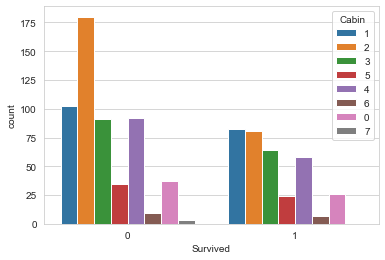

In [73]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Cabin",data=train)

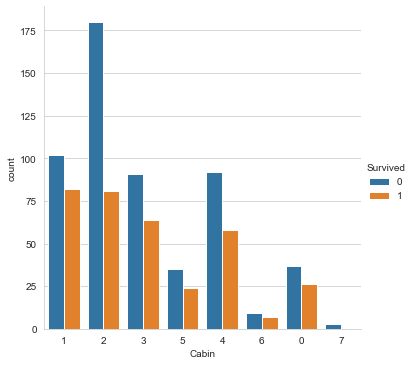

In [74]:
sns.catplot(x='Cabin',kind='count',data=train,hue='Survived')

In [75]:
# maximum survived from cabin B and C


In [76]:
index1=np.where(train['Survived']==max(train['Survived']))

In [77]:
train.loc[index1]['Cabin'].value_counts()

1    82
2    81
3    64
4    58
0    26
5    24
6     7
Name: Cabin, dtype: int64

In [78]:
# maximum survived from B and C and least from G.

# # SEX

In [79]:
train['Sex'].isnull().sum()

0

In [80]:
# there are only two values male and female.
# replacing female with 0 and male with 1 and changing its type to integer.

In [81]:
train['Sex']=train['Sex'].map({'female':0,'male':1}).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,7.9250,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,8.0500,5,1


In [82]:
train[['Survived','Sex']].groupby(['Sex']).mean()

,Survived
Sex,
0,0.742038
1,0.188908


In [83]:
train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [84]:
train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex
0         0       81
          1      468
1         0      233
          1      109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

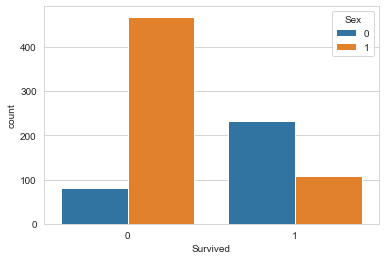

In [85]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Sex",data=train)

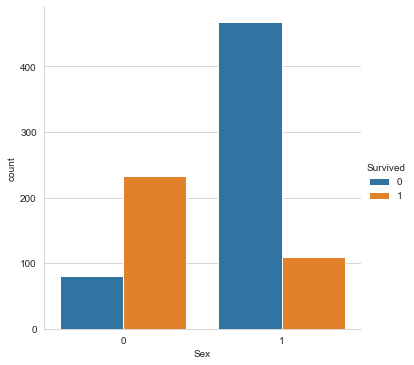

In [86]:
sns.catplot(x='Sex',kind='count',data=train,hue='Survived')

In [87]:
# This shows the females survived the most.

In [88]:
index1=np.where(train['Survived']==max(train['Survived']))

In [89]:
train.loc[index1]['Sex'].value_counts()

0    233
1    109
Name: Sex, dtype: int64

In [90]:
# so out of 577 male 109 survived
# out of 314 females 233 survived hence survival rate of females is more ie 74 percent and for males it is 18 percent

# # P Class

In [91]:
train['Pclass'].isnull().sum()

0

In [92]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [93]:
# there are three pclass  1=Upper class 2= Middle class 3=Lower class 
# most of the people where from passenger class 3

In [94]:
train.groupby(['Survived','Pclass'])['Survived'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

In [95]:
train[['Survived','Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [96]:
# this shows that maximum people survived from Pclass 1 and least from Pclass 3. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

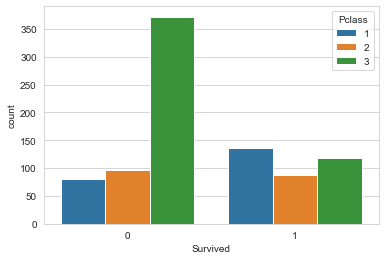

In [97]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Pclass",data=train)

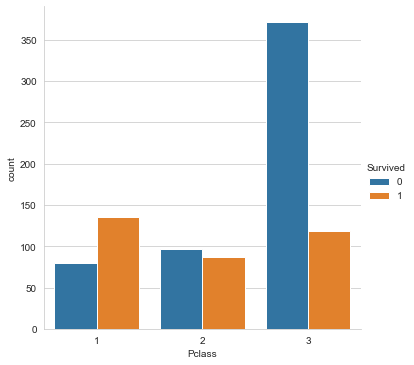

In [98]:
sns.catplot(x='Pclass',kind='count',data=train,hue='Survived')

In [99]:
# Most of the poeple who have survived belong to passenger class 1.
# their survival rate is 62 percent 
# survival rate of the people from 3rd class is least (24 percent).

# # Sibsp(Number of siblings and spouses of the passenger aboard)

In [100]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

<AxesSubplot:>

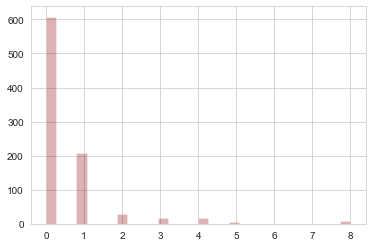

In [101]:
train['SibSp'].hist(bins=30,color='darkred',alpha=0.3)

In [102]:
train[['Survived','SibSp']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


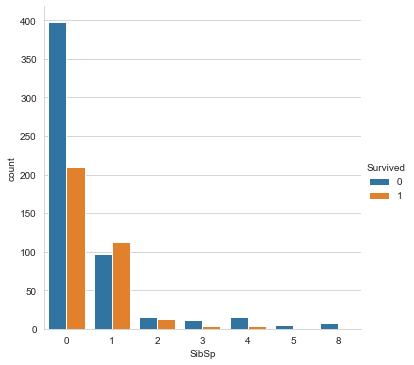

In [103]:
sns.catplot(x='SibSp',kind='count',data=train,hue='Survived')

# #Parch (Number of parents and children of the passenger aboard)

In [104]:
train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

<AxesSubplot:>

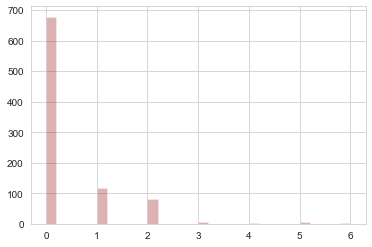

In [105]:
train['Parch'].hist(bins=30,color='darkred',alpha=0.3)

In [106]:
train[['Survived','Parch']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


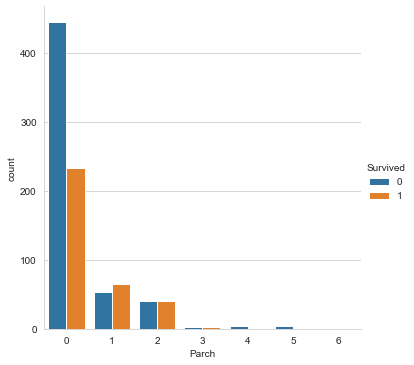

In [107]:
sns.catplot(x='Parch',kind='count',data=train,hue='Survived')

In [108]:
# concate the parch and sibsp as family
train['Family']=train['SibSp']+train['Parch']

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,7.2500,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,7.9250,3,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,53.1000,2,1,1
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,8.0500,5,1,0


In [110]:
# find the correlation between survived and family.

In [111]:
train[['Survived','Family']].groupby(['Family']).count()

,Survived
Family,
0,537
1,161
2,102
3,29
4,15
5,22
6,12
7,6
10,7


In [112]:
train[['Survived','Family']].groupby(['Family']).mean()

,Survived
Family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


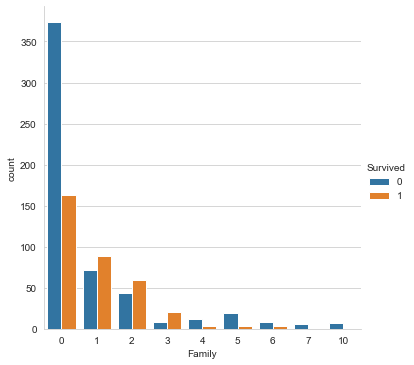

In [113]:
sns.catplot(x='Family',kind='count',data=train,hue='Survived')

In [114]:
# most of the people survived were travelling alone (family=0)


In [115]:
# after creating family column drop both sibsp and parch column from the data set
train.drop(['SibSp','Parch'], axis=1,inplace= True)

In [116]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,2,A/5 21171,7.2500,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,PC 17599,71.2833,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,2,STON/O2. 3101282,7.9250,3,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,113803,53.1000,2,1,1
4,5,0,3,"Allen, Mr. William Henry",1,3,373450,8.0500,5,1,0


# #FARE

In [117]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

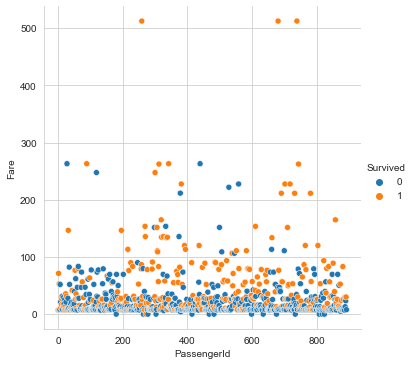

In [118]:
sns.relplot(x='PassengerId',y='Fare',data=train,hue='Survived')

In [119]:
# people who paid highest fare survived most

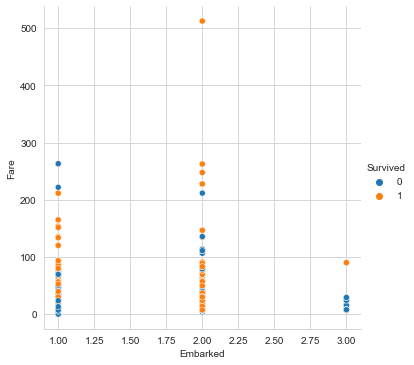

In [120]:
sns.relplot(x='Embarked',y='Fare',data=train,hue='Survived')

In [121]:
# highest fair was paid by the passsenger who was boarded from 'C' port

In [122]:
min_index=np.where(train['Fare']==min(train['Fare']))

In [123]:
a=train.loc[min_index]['Survived'].value_counts()
a                   

0    14
1     1
Name: Survived, dtype: int64

In [124]:
max_fare=np.where(train['Fare']==max(train['Fare']))


In [125]:
b=train.loc[max_fare]['Survived'].value_counts()

In [126]:
b

1    3
Name: Survived, dtype: int64

In [127]:
# Convert data type of Fare into int and replace the categories by integer

In [128]:
train.loc[train['Fare']<=150,'Fare']=0
train.loc[(train['Fare']>150) & (train['Fare']<=250),'Fare']=1
train.loc[(train['Fare']>250) & (train['Fare']<=350),'Fare']=2
train.loc[(train['Fare']>350) & (train['Fare']<=450),'Fare']=3
train.loc[(train['Fare']>450) & (train['Fare']<=550),'Fare']=4
train['Fare']=train['Fare'].astype(int)

In [129]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,2,A/5 21171,0,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,PC 17599,0,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,2,STON/O2. 3101282,0,3,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,113803,0,2,1,1
4,5,0,3,"Allen, Mr. William Henry",1,3,373450,0,5,1,0


In [130]:
train[['Survived','Fare']].groupby('Fare').mean()

,Survived
Fare,
0,0.373550
1,0.650000
2,0.666667
4,1.000000


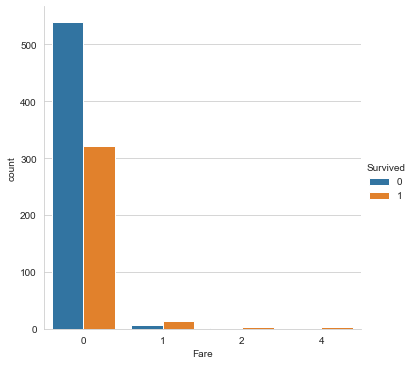

In [131]:
sns.catplot(x='Fare',kind='count',data=train,hue='Survived')

# # Ticket

In [132]:
train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [133]:
#There are 681 unique values in ticket column and its difficult to use it therefore drop this column.

In [134]:
train.drop(['Ticket'],axis=1,inplace=True)

In [135]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,2,0,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,0,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,3,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,0,2,1,1
4,5,0,3,"Allen, Mr. William Henry",1,3,0,5,1,0


# # Name 

In [136]:
train['Name'].describe()

count                                  891
unique                                 891
top       Salkjelsvik, Miss. Anna Kristine
freq                                     1
Name: Name, dtype: object

In [137]:
# here are 891 unique values but we can extract the salutation of every name and put in another column name_title.

In [138]:
lst=[]
for i in train['Name']:
    ind=i.find(', ')
    index=i.find('.')
    lst.append(i[ind+1:index])

In [139]:
lst

[' Mr',
 ' Mrs',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mrs',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Don',
 ' Mrs',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Master',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Master',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mr'

In [140]:
train['Name_title']=pd.Series(lst)

In [141]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family,Name_title
0,1,0,3,"Braund, Mr. Owen Harris",1,2,0,1,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,0,2,2,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,3,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,0,2,1,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,3,0,5,1,0,Mr


In [142]:
train['Name_title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Ms                1
 Mme               1
 the Countess      1
 Sir               1
 Lady              1
 Capt              1
 Don               1
 Jonkheer          1
Name: Name_title, dtype: int64

In [143]:
# now replace rare values with Other.

In [144]:

train['Name_title'] = train['Name_title'].replace(to_replace=[' Dr', ' Rev',' Mlle', ' Col', ' Major', ' Sir',' Ms', ' the Countess',' Lady',' Mme', ' Jonkheer',' Capt',' Don'],value ='Other')

In [145]:
train['Name_title'].value_counts()

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Other       27
Name: Name_title, dtype: int64

In [146]:
train['Name_title'] = train['Name_title'].replace('Other',0)
train['Name_title'] = train['Name_title'].replace(' Mr',1)
train['Name_title'] = train['Name_title'].replace(' Mrs',2)
train['Name_title'] = train['Name_title'].replace(' Miss',3)
train['Name_title'] = train['Name_title'].replace(' Master',4)

In [147]:
train['Name_title'].value_counts()

1    517
3    182
2    125
4     40
0     27
Name: Name_title, dtype: int64

In [148]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family,Name_title
0,1,0,3,"Braund, Mr. Owen Harris",1,2,0,1,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,0,2,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,3,1,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,0,2,1,1,2
4,5,0,3,"Allen, Mr. William Henry",1,3,0,5,1,0,1


In [149]:
train.drop(['Name'],axis=1,inplace=True)

In [150]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Name_title
0,1,0,3,1,2,0,1,1,1,1
1,2,1,1,0,3,0,2,2,1,2
2,3,1,3,0,2,0,3,1,0,3
3,4,1,1,0,3,0,2,1,1,2
4,5,0,3,1,3,0,5,1,0,1


In [151]:
train['Name_title'].dtypes

dtype('int64')

In [152]:
train['Name_title']=train['Name_title'].fillna(0)

In [153]:
train[['Survived','Name_title']].groupby(['Name_title']).mean()

,Survived
Name_title,
0,0.444444
1,0.156673
2,0.792000
3,0.697802
4,0.575000


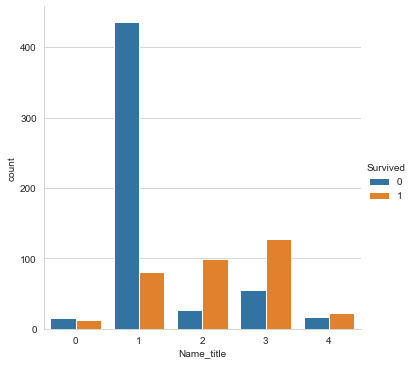

In [154]:
sns.catplot(x='Name_title',kind='count',data=train,hue='Survived')

In [155]:
train.drop(['PassengerId'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Name_title
0,0,3,1,2,0,1,1,1,1
1,1,1,0,3,0,2,2,1,2
2,1,3,0,2,0,3,1,0,3
3,1,1,0,3,0,2,1,1,2
4,0,3,1,3,0,5,1,0,1


In [156]:
# Sex : male = 1 , female = 0
# Age : Below 10 as 0
#       from 10 to 20 as 1 
#       from 20 to 30 as 2
#       from 30 to 40 as 3 
#       from 40 to 50 as 4 
#       from 50 to 60 as 5 
#       from 60 to 70 as 6 
#       from 70 to 80 as 7
# new_cabin :
#       A=1 , B=2, C=3 ,D=4 ,E=5 ,F=6 ,G=7 ,T=8
# Fare:
#       below 150 as 1
#       150-250 as 2
#       250-350 as 3
#       350-450 as 4
#       450=550 as 5
# name_title:
#       Other = 0
#       Mr = 1
#       Mrs = 2
#       Miss = 3
#       Master = 4

## Building a Logistic Regression model

In [157]:
# Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and predicting

In [160]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [161]:
sc=MinMaxScaler(feature_range=(0,1))
X_train_scaled=sc.fit_transform(X_train)

In [162]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [163]:
predictions = logmodel.predict(X_test)

In [164]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1], dtype=int64)

In [165]:
import pickle 

In [167]:
pickle.dump(logmodel,open("titanic_survival_model.sav","wb"))
pickle.dump(sc,open("scaler.sav","wb"))